# Set up parameter space, morphing, benchmark points

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging

from madminer.core import MadMiner
from madminer.plotting import plot_2d_morphing_basis


In [2]:
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.DEBUG
)

for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [3]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_4/'

In [4]:
sample_dir = base_dir + 'data/samples/wgamma_sys/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma_sys/'
log_dir = base_dir + 'logs/wgamma_sys/'
temp_dir = base_dir + 'data/temp'

## Load setup (and then skip the next steps)

In [5]:
mm = MadMiner()
mm.load(sample_dir + 'setup.h5')

20:38 madminer.utils.inter INFO    HDF5 file does not contain is_reference field.
20:38 madminer.core        INFO    Found 2 parameters:
20:38 madminer.core        INFO       cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.02, 0.02))
20:38 madminer.core        INFO       cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.02, 0.02))
20:38 madminer.core        INFO    Found 6 benchmarks:
20:38 madminer.core        INFO       sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00
20:38 madminer.core        INFO       morphing_basis_vector_1: cWWW = -6.07e-03, cWWWtilde = -1.84e-02
20:38 madminer.core        INFO       morphing_basis_vector_2: cWWW = 1.00e-02, cWWWtilde = 1.70e-02
20:38 madminer.core        INFO       morphing_basis_vector_3: cWWW = -1.99e-02, cWWWtilde = 1.87e-02
20:38 madminer.core        INFO       morphing_basis_vector_4: cWWW = 1.97e-02, cWWWtilde = -1.53e-02
20:38 madminer.core        INFO       morphing_basis_vector_5: cWWW = -1.65e-02, cWWWti

## Parameter space

In [6]:
parameter_range = (-0.01, 0.01)
mm = MadMiner()

mm.add_parameter(
    lha_block='dim6',
    lha_id=1,
    parameter_name='cWWW',
    morphing_max_power=(2,),
    parameter_range=parameter_range
)
mm.add_parameter(
    lha_block='dim6',
    lha_id=2,
    parameter_name='cWWWtilde',
    morphing_max_power=(2,),
    parameter_range=parameter_range
)

20:38 madminer.core        INFO    Added parameter cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.01, 0.01))
20:38 madminer.core        INFO    Added parameter cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.01, 0.01))


## Benchmark points

In [7]:
mm.add_benchmark(
    {'cWWW':0., 'cWWWtilde':0.},
    'sm'
)

20:38 madminer.core        INFO    Added benchmark sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00)


In [8]:
mm.set_morphing(
    include_existing_benchmarks=True,
    n_trials=1000,
    n_test_thetas=1000,
    max_overall_power=(2,)
)

20:38 madminer.core        INFO    Optimizing basis for morphing
20:38 madminer.morphing    DEBUG   Region 0: max overall power 2, max individual powers [2, 2]
20:38 madminer.morphing    DEBUG     Adding component [0 0]
20:38 madminer.morphing    DEBUG     Adding component [0 1]
20:38 madminer.morphing    DEBUG     Adding component [0 2]
20:38 madminer.morphing    DEBUG     Adding component [1 0]
20:38 madminer.morphing    DEBUG     Adding component [1 1]
20:38 madminer.morphing    DEBUG     Adding component [2 0]
20:38 madminer.core        INFO    Added benchmark sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00)
20:38 madminer.core        INFO    Added benchmark morphing_basis_vector_1: cWWW = 3.58e-03, cWWWtilde = 8.37e-03)
20:38 madminer.core        INFO    Added benchmark morphing_basis_vector_2: cWWW = -7.12e-03, cWWWtilde = 5.34e-03)
20:38 madminer.core        INFO    Added benchmark morphing_basis_vector_3: cWWW = -8.14e-03, cWWWtilde = -6.48e-03)
20:38 madminer.core        INFO    Add

## Check morphing errors

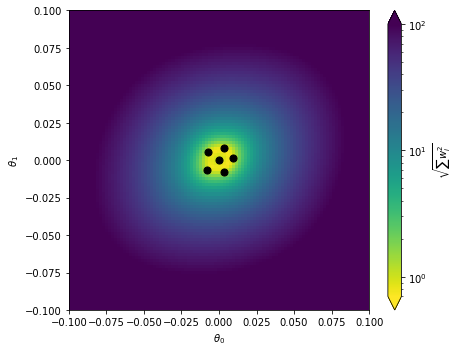

In [9]:
fig = plot_2d_morphing_basis(mm.morpher, xrange=(-0.1,0.1), yrange=(-0.1,0.1), crange=(0.7,100.))

## Systematics

In [10]:
mm.set_systematics(scale_variation=(0.5,2), scales="together", pdf_variation="90900")

## Save setup

In [11]:
mm.save(sample_dir + 'setup.h5')

20:38 madminer.core        INFO    Saving setup (including morphing) to /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma_sys/setup.h5
